In [7]:
from PIL import Image
import numpy as np
import pylab as plt


In [22]:
def plot_image(fig_name, fig_type, result_path, image):
    to_save = Image.fromarray(image)
    to_save = to_save.save(result_path+fig_name+fig_type)
    fig = plt.figure(frameon=False)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    plt.imshow(image, cmap='gray')
    plt.show()

In [21]:
def plot_histogram(fig_name, text, result_path, h):
    plt.plot(h)
    plt.title(text) #hist of equalized image
    plt.savefig(result_path+fig_name,bbox_inches='tight', pad_inches=0)
    plt.show()
    plt.close()

In [25]:
def equalize_histogram(im):
	m, n = im.shape
	h = [0.0] * 256
	for i in range(m):
		for j in range(n):
			h[im[i, j]]+=1
	h = np.array(h)/(m*n)
	cdf = np.array([sum(h[:i+1]) for i in range(len(h))])
	sk = np.uint8(255 * cdf) 
	s1, s2 = im.shape
	Y = np.zeros_like(im)
	for i in range(0, s1):
		for j in range(0, s2):
			Y[i, j] = sk[im[i, j]]
	m, n = Y.shape
	H = [0.0] * 256
	for i in range(m):
		for j in range(n):
			H[Y[i, j]]+=1
	H = np.array(H)/(m*n)
	return Y , h, H

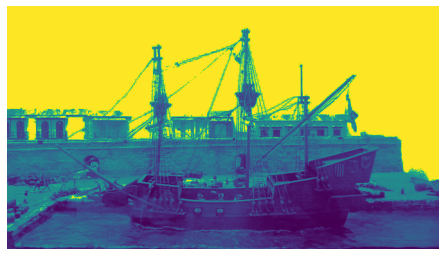

In [27]:
fig_name = "Escurecer_(3)"
fig_type = ".jpg"
result_path = "./result/"+fig_name+"/"
img = Image.open("./"+fig_name+fig_type) 
img_arr = np.array(img)
new_img, h, new_h = equilize_histogram(img_arr)
plot_image(fig_name, fig_type, result_path, new_img) 

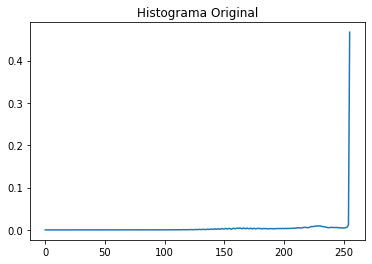

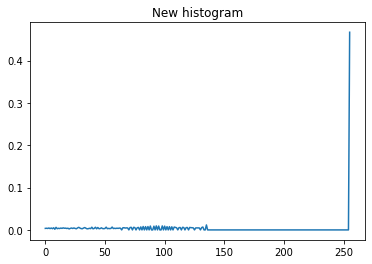

In [45]:
plot_histogram("orig_hist", "Histograma Original", result_path, h)
plot_histogram("new_hist", 'New histogram', result_path, new_h)